# Iris data set con MiniSon

In [1]:
from minisom import MiniSom
import numpy as np
import pandas as pd


In [2]:
#Cargamos data set

path_file = 'C:\\Users\\dieku\\Documents\\GitHub\\cyberseguridad-code\\Experimentos\\Experimentos_Diego\\Datasets\\iris.csv'

data = pd.read_csv(path_file)

data

,5.1,3.5,1.4,0.2,setosa
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [3]:
Labels = {'setosa', 'virginica', 'versicolour'}

In [4]:
dataX = data.drop(['setosa'], axis=1).copy()
dataX = dataX.sort_values('3.5')

In [5]:
#Normalizacion.

dataX = (dataX-np.mean(dataX, axis=0)) / np.std(dataX,axis=0)
dataX_val = dataX.values
dataX_val


array([[-1.02726211, -2.43265089, -0.15652104, -0.27067375],
       [ 0.18367186, -1.96973265,  0.12858453, -0.27067375],
       [ 0.18367186, -1.96973265,  0.69879566,  0.38831953],
       [ 0.42585866, -1.96973265,  0.41369009,  0.38831953],
       [-1.02726211, -1.73827353, -0.27056327, -0.27067375],
       [-1.63272909, -1.73827353, -1.41098555, -1.19326436],
       [-0.42179512, -1.73827353,  0.12858453,  0.12472222],
       [ 0.54695205, -1.73827353,  0.35666898,  0.12472222],
       [-1.1483555 , -1.50681441, -0.27056327, -0.27067375],
       [-0.42179512, -1.50681441,  0.0145423 , -0.1388751 ],
       [-0.42179512, -1.50681441, -0.04247882, -0.27067375],
       [ 0.54695205, -1.27535529,  0.69879566,  0.91551417],
       [-1.1483555 , -1.27535529,  0.41369009,  0.65191685],
       [-0.17960833, -1.27535529,  0.69879566,  1.04731282],
       [ 0.54695205, -1.27535529,  0.64177455,  0.38831953],
       [-0.90616871, -1.27535529, -0.44162661, -0.1388751 ],
       [-0.30070172, -1.

In [6]:
dataX.shape

(149, 4)

In [7]:
#Iniciando red 

som_shape = (2,3)
som = MiniSom(som_shape[0], som_shape[1], dataX.shape[1], sigma=.3, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)
som.train(dataX_val, 500,verbose=True)



 [ 500 / 500 ] 100% - 0:00:00 left 


 quantization error: 0.933293379873792


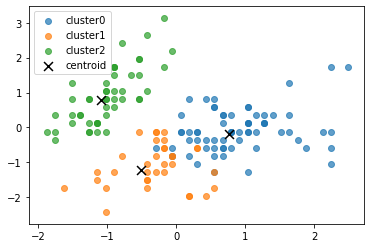

In [14]:
#A dibujar OIQWJD 

winner_coordinates = np.array([som.winner(x) for x in dataX_val]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

import matplotlib.pyplot as plt
%matplotlib inline

for c in np.unique(cluster_index):
    plt.scatter(dataX_val[cluster_index == c, 0],
                dataX_val[cluster_index == c, 1],
                label = 'cluster'+str(c), alpha=.7)

#Dibujo de centroides XD

for centroid in som.get_weights():
    plt.scatter(centroid[:,0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')

plt.legend();

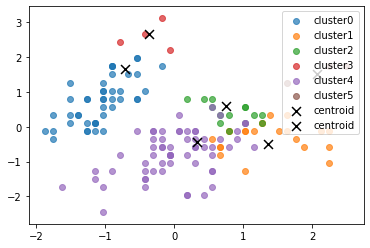

In [8]:
#A dibujar, este resultado es una vez desordenada la matriz o el dataframe

winner_coordinates = np.array([som.winner(x) for x in dataX_val]).T

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

import matplotlib.pyplot as plt
%matplotlib inline

for c in np.unique(cluster_index):
    plt.scatter(dataX_val[cluster_index == c, 0],
                dataX_val[cluster_index == c, 1],
                label = 'cluster'+str(c), alpha=.7)

#Dibujo de centroides XD

for centroid in som.get_weights():
    plt.scatter(centroid[:,0], centroid[:, 1], marker='x', s=80, linewidths=35, color='k', label='centroid')

plt.legend();